# 1. Cargar Datos.
## Cargar los datos en Pandas DataFrames, asegurándose de conectar el volumen de datos en comparación del valor o capitalización en dólares para el mercado, intentando analizar el comportamiento proporcional entre ambos


In [3]:
# normalmente los csv vienen separados por "," en este caso especial, por ";"
import pandas as pd
import os
import glob
from IPython.core.display import HTML
from IPython.display import HTML, display

    #display(HTML(df_data.to_html()))

ruta = 'archive'

files = glob.glob(os.path.join(ruta, '*.csv'))

dataframes= []

for file in files:
    df = pd.read_csv(file, delimiter=',')  # Asegúrate de especificar el delimitador correcto si es diferente de ","
    dataframes.append(df)



    # Concatenar todos los DataFrames en uno solo, en caso de necesitar usarlo
data_crypto = pd.concat(dataframes, ignore_index=True)


    # Ahora puedes imprimir la información del DataFrame
print("___________________________data crypto_____________________________")
data_crypto.info()
    
def cargarDatos():
    
    print("___________________________MONEDAS CON MAS VOLUMEN DE MERCADO_____________________________")
    display(HTML(data_crypto.sort_values(by=['total_volume'], ascending=[False]).head(10).to_html())) # print
    print("___________________________MONEDAS CON MAS MARKET CAP_____________________________")
    display(HTML(data_crypto.sort_values(by=['market_cap'], ascending=[False]).head(10).to_html())) # print
    
cargarDatos()



___________________________data crypto_____________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98378 entries, 0 to 98377
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          98378 non-null  object 
 1   price         98378 non-null  float64
 2   total_volume  98378 non-null  float64
 3   market_cap    98373 non-null  float64
 4   coin_name     98378 non-null  object 
dtypes: float64(3), object(2)
memory usage: 3.8+ MB
___________________________MONEDAS CON MAS VOLUMEN DE MERCADO_____________________________


,date,price,total_volume,market_cap,coin_name
82338,2021-11-03 00:00:00.000,1.004494,9.267677e+11,7.135497e+10,tether
82606,2022-07-29 00:00:00.000,0.999281,9.089869e+11,6.589619e+10,tether
82171,2021-05-20 00:00:00.000,0.994191,2.953730e+11,5.818223e+10,tether
82165,2021-05-14 00:00:00.000,0.992983,2.581028e+11,5.793508e+10,tether
82138,2021-04-17 00:00:00.000,0.998927,2.325612e+11,4.696648e+10,tether
82140,2021-04-19 00:00:00.000,1.000584,2.315707e+11,4.844025e+10,tether
82172,2021-05-21 00:00:00.000,1.004577,2.261466e+11,5.846789e+10,tether
82158,2021-05-07 00:00:00.000,1.000299,2.134757e+11,5.373905e+10,tether
82162,2021-05-11 00:00:00.000,1.007187,2.051152e+11,5.610405e+10,tether
82157,2021-05-06 00:00:00.000,0.998492,2.036819e+11,5.302383e+10,tether


___________________________MONEDAS CON MAS MARKET CAP_____________________________


,date,price,total_volume,market_cap,coin_name
14766,2024-03-14 00:00:00.000,73097.767027,5.190660e+10,1.436631e+12,bitcoin
14764,2024-03-12 00:00:00.000,72130.553008,6.665307e+10,1.417773e+12,bitcoin
14767,2024-03-15 00:00:00.000,71420.031801,6.307355e+10,1.403843e+12,bitcoin
14765,2024-03-13 00:00:00.000,71467.173503,6.459934e+10,1.403693e+12,bitcoin
14768,2024-03-16 00:00:00.000,69497.763193,8.120443e+10,1.367669e+12,bitcoin
14763,2024-03-11 00:00:00.000,69075.666882,3.666054e+10,1.357390e+12,bitcoin
14762,2024-03-10 00:00:00.000,68508.003963,2.135971e+10,1.346027e+12,bitcoin
14770,2024-03-18 00:00:00.000,68425.415656,4.719098e+10,1.344509e+12,bitcoin
14761,2024-03-09 00:00:00.000,68315.251921,6.334659e+10,1.340971e+12,bitcoin
14757,2024-03-05 00:00:00.000,68186.645934,7.455171e+10,1.333913e+12,bitcoin


# 2. Preprocesado de datos
## Realizar un preprocesado de datos identificando los valores faltantes o nulos, su corrección, y el cambio del tipo de datos (astype); además con el comando str.upper() poner los index en mayúsculas, separar por grupos (usar comando groupby) dependiendo del valor de mercado en la fecha 1 de Enero de 2015 y organizarlos por valor ascendente.

# ●	Calcular la media de las criptomonedas para el año 2015 y seleccionar la desviación estándar menor entre ellas.

In [25]:
def crear_html(a, m, d):
    # HTML y CSS para dar estilo a la salida
    html_style = """
    <style>
        table {
            font-family: Arial, sans-serif;
            border-collapse: collapse;
            width: 100%;
            margin-left: auto;
            margin-right: auto;
        }

        th {
            background-color: #f2f2f2;
            padding: 8px;
            text-align: left;
            border-bottom: 1px solid #ddd;
        }
        
        h3 {
            background-color: #f2f2f2;
            padding: 8px;
            text-align: center;
            border-bottom: 1px solid #ddd;
        }
        
        td {
            padding: 8px;
            text-align: left;
            border-bottom: 1px solid #ddd;
        }

        tr:hover {
            background-color: #f2f2f2;
        }
    </style>
    """
    html_table = f"""
    {html_style}
    <h4>La media es :{a:.2f}
    </h4>
    <br>
    <div style="text-align: center;">
        <table>
            <tr>
                <th>Criptomoneda</th>
                <th>Desviación Estándar</th>
            </tr>
            <tr>
                <td>{m}</td>
                <td>{d:.7f}</td>
            </tr>
        </table>
    </div>
    """
    return html_table


def parte_2():
    # Filtrar los datos para incluir solo las observaciones del año 2015
    data_2015 = data_crypto[data_crypto['date'].str.startswith('2015')]

    # Agrupar los datos por el nombre de la criptomoneda
    data_agrupada = data_2015.groupby('coin_name')

    # Calcular la media 
    media = data_crypto['price'].mean()
    # Calcular la desviación estándar
    crip_desv = data_agrupada['price'].std()

    # Encontrar la criptomoneda con la desviación estándar más baja
    moneda_baja_desviasion = crip_desv.idxmin()
    # el valor mas bajo
    moneda_bajo_valor = crip_desv.min()

    # Crear la cadena HTML
    html_resultados = crear_html(calcular_media(), moneda_baja_desviasion, moneda_bajo_valor)

    display(HTML(html_resultados))
    #ejecutar el codigo
parte_2()


Criptomoneda,Desviación Estándar
dogecoin,0.0000257


# ●	Determinar cuáles criptomonedas están por encima de la media.

In [26]:

def Mayor_media_2015():
    media = data_crypto['price'].mean()
    monedas_arriba_media =data_crypto[data_crypto['price'] > media]
    display(HTML(monedas_arriba_media.to_html()))
parte_3()

,date,price,total_volume,market_cap,coin_name
9087,2017-11-11 00:00:00.000,1366.273116,4.918415e+09,2.293824e+10,bitcoin-cash
9088,2017-11-12 00:00:00.000,1539.127636,7.685795e+09,2.585744e+10,bitcoin-cash
9089,2017-11-13 00:00:00.000,1363.997067,3.487359e+09,2.291624e+10,bitcoin-cash
9090,2017-11-14 00:00:00.000,1284.956366,1.247502e+09,2.159051e+10,bitcoin-cash
9091,2017-11-15 00:00:00.000,1223.413101,1.169806e+09,2.055897e+10,bitcoin-cash
9093,2017-11-17 00:00:00.000,1167.937025,2.915873e+09,1.963022e+10,bitcoin-cash
9094,2017-11-18 00:00:00.000,1249.330619,2.755313e+09,2.100083e+10,bitcoin-cash
9095,2017-11-19 00:00:00.000,1171.024037,1.150448e+09,1.968645e+10,bitcoin-cash
9096,2017-11-20 00:00:00.000,1227.947691,7.101531e+08,2.064558e+10,bitcoin-cash
9097,2017-11-21 00:00:00.000,1177.720623,7.083237e+08,1.980340e+10,bitcoin-cash


# ●	En los últimos tres meses del año 2015, determine cuáles fueron las criptomonedas que tuvieron un mayor valor en el mercado.

In [28]:
def Mayor_cripto_2015():
    cripto_2015 = data_crypto[data_crypto['date'].str.startswith('2015-10') | #busca todos los meses desde octubre
                                               data_crypto['date'].str.startswith('2015-11') | 
                                               data_crypto['date'].str.startswith('2015-12')]
    Cripto_mayor = cripto_2015.sort_values(by = 'market_cap', ascending = False)
    return display(HTML(Cripto_mayor.to_html()))

def Mayor_cripto_2015():
    cripto_2015 = data_crypto[data_crypto['date'].str.startswith('2015-10') | 
                               data_crypto['date'].str.startswith('2015-11') | 
                               data_crypto['date'].str.startswith('2015-12')]
    Cripto_mayor = cripto_2015.sort_values(by='market_cap', ascending=False)
    return display(HTML(Cripto_mayor.to_html()))


,date,price,total_volume,market_cap,coin_name
11754,2015-12-15 00:00:00.000,464.999000,1.555252e+09,6.958908e+09,bitcoin
11757,2015-12-18 00:00:00.000,463.816000,1.135227e+09,6.946908e+09,bitcoin
11758,2015-12-19 00:00:00.000,462.053000,5.569411e+08,6.922224e+09,bitcoin
11764,2015-12-25 00:00:00.000,455.742000,1.058738e+09,6.838204e+09,bitcoin
11756,2015-12-17 00:00:00.000,456.473000,1.302614e+09,6.834976e+09,bitcoin
11763,2015-12-24 00:00:00.000,454.907000,1.418671e+09,6.823821e+09,bitcoin
11755,2015-12-16 00:00:00.000,453.914000,8.966864e+08,6.794809e+09,bitcoin
11750,2015-12-11 00:00:00.000,452.415000,1.623481e+09,6.762813e+09,bitcoin
11762,2015-12-23 00:00:00.000,442.821000,9.559491e+08,6.640942e+09,bitcoin
11753,2015-12-14 00:00:00.000,443.277000,1.497157e+09,6.631779e+09,bitcoin


Graficar en una sola figura y varios subplots el precio de las 4 criptomonedas más interesantes para usted en el año 2015

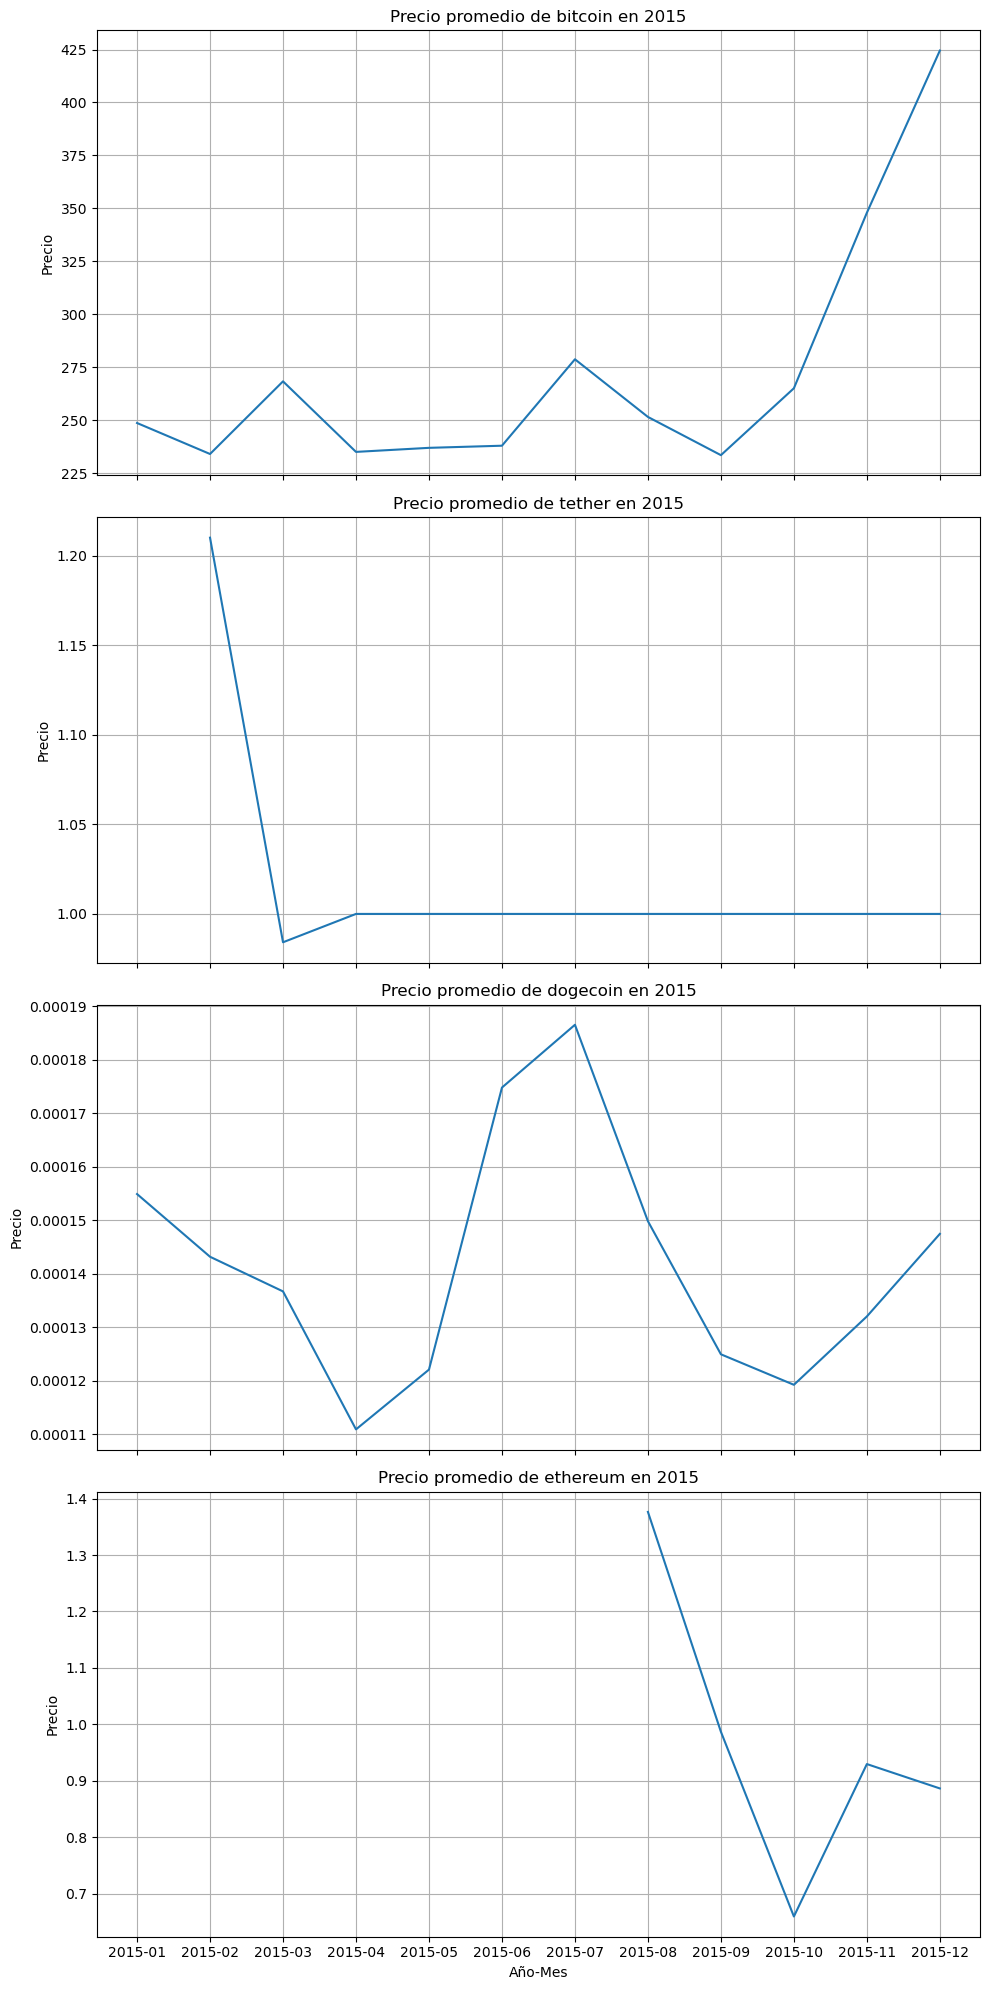

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

def graficar_2015(): 
    global data_crypto
    data_2015 = data_crypto[data_crypto["date"].str.startswith("2015")].copy()
    monedas_interesantes = ["bitcoin", "tether", "dogecoin", "ethereum"]
    
    # Convertir la columna "date" a tipo datetime
    data_2015['date'] = pd.to_datetime(data_2015['date'])
    
    # Extraer el año y el mes de la fecha y convertirlo a cadena
    data_2015['year_month'] = data_2015['date'].dt.to_period('M').astype(str)
    
    # Agrupar por año-mes, moneda y calcular la media del precio
    data_grouped = data_2015.groupby(['year_month', 'coin_name'])['price'].mean().reset_index()
    
    # Crea subplots
    fig, axs = plt.subplots(4, 1, figsize=(10, 20), sharex=True)
    
    # Itera sobre las monedas y grafica el precio promedio en cada subplot
    for i, moneda in enumerate(monedas_interesantes):
        data_moneda = data_grouped[data_grouped["coin_name"] == moneda]
    
        axs[i].plot(data_moneda["year_month"], data_moneda["price"])
        axs[i].set_title(f"Precio promedio de {moneda} en 2015")
        axs[i].set_ylabel("Precio")
        axs[i].grid(True)
    
    plt.xlabel("Año-Mes")
    plt.tight_layout()
    plt.show()

graficar_2015()